# 2. 한국거래소 전체 종목 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('krx.csv')

<br>

## 2.1 데이터 미리보기

In [3]:
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [4]:
# sample() : 랜덤하게 1개 리턴
df.sample()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1329,131370,KOSDAQ,알서포트,소프트웨어 개발 및 공급업,"원격지원,제어 솔루션",2011-01-05,12월,서형수,http://www.rsupport.com,서울특별시


<br>

## 2.2 데이터 요약하기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          2614 non-null   object
 1   Market          2614 non-null   object
 2   Name            2614 non-null   object
 3   Sector          2411 non-null   object
 4   Industry        2392 non-null   object
 5   ListingDate     2411 non-null   object
 6   SettleMonth     2411 non-null   object
 7   Representative  2411 non-null   object
 8   HomePage        2239 non-null   object
 9   Region          2411 non-null   object
dtypes: object(10)
memory usage: 204.3+ KB


In [6]:
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,2614,2614,2614,2411,2392,2411,2411,2411,2239,2411
unique,2614,3,2614,158,2240,1777,9,2297,2218,21
top,03473K,KOSDAQ,F&F,특수 목적용 기계 제조업,기업인수합병,1996-07-03,12월,-,http://www.sempio.com,서울특별시
freq,1,1471,1,141,37,8,2351,4,2,969


In [7]:
# 중복을 제외한 unique 값 확인
df.nunique()

Symbol            2614
Market               3
Name              2614
Sector             158
Industry          2240
ListingDate       1777
SettleMonth          9
Representative    2297
HomePage          2218
Region              21
dtype: int64

In [8]:
# index 값 보기
df.index

RangeIndex(start=0, stop=2614, step=1)

In [9]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [10]:
# 값 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '이현우',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호, 염두성 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

In [11]:
pd.DataFrame(df.values)

,0,1,2,3,4,5,6,7,8,9
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2612,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


<br>

## 2.3 데이터 색인하기

### 2.3.1 `Series`

In [12]:
# 하나의 컬럼 가져오기
df["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
2609    흥국화재2우B
2610      흥국화재우
2611       흥아해운
2612         희림
2613         힘스
Name: Name, Length: 2614, dtype: object

In [13]:
type(df['Name'])

pandas.core.series.Series

In [14]:
# 첫 번째 행 데이터 가져오기
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                   특수 목적용 기계 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [15]:
type(df.loc[0])

pandas.core.series.Series

<br>

### 2.3.2 `DataFrame`

In [16]:
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2612,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
# 두 개 이상의 컬럼 가져오기 -> 각 컬럼명을 리스트 타입으로 지정
df[['Name', 'Symbol']]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520
...,...,...
2609,흥국화재2우B,000547
2610,흥국화재우,000545
2611,흥아해운,003280
2612,희림,037440


In [19]:
type(df[['Name', 'Symbol']])

pandas.core.frame.DataFrame

In [20]:
# 두 개 이상의 행 가져오기 -> 각 인덱스를 리스트 타입으로 지정
df.loc[[0,1]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시


In [21]:
type(df.loc[[0, 1]])

pandas.core.frame.DataFrame

In [22]:
df[['Name']]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
2609,흥국화재2우B
2610,흥국화재우
2611,흥아해운
2612,희림


In [23]:
type(df[['Name']])

pandas.core.frame.DataFrame

In [24]:
type(df['Name'])

pandas.core.series.Series

`df['Name']` : Series  
`df[['Name']]` : DataFrame

<br>

### 2.3.3 `loc`를 이용한 서브셋 가져오기

In [25]:
# df.loc[행, 열]
df.loc[0, 'Name']

'3S'

- 행, 열 접근은 다음과 같은 방식으로도 가능하다.
  - `df['Name'][0]`
- 하지만, 이 방식을 데이터프레임에 2번 접근하므로 비효율적이다.
- 따라서, 행, 열 접근은 다음과 같은 방식이 효율적이다.
  - `df.loc[0, 'Name']`

In [26]:
# 여러개의 행과 하나의 열
df.loc[[0, 1], 'Name']

0        3S
1    AJ네트웍스
Name: Name, dtype: object

In [27]:
# 하나의 행과 여러 개의 열
df.loc[0, ['Name', 'Symbol']]

Name          3S
Symbol    060310
Name: 0, dtype: object

In [28]:
# 여러개의 행과 여러개의 열
df.loc[[0,1], ['Name', 'Symbol']]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570


<br>

### 2.3.4 boolean indexing

- 특정 조건을 만족하는 서브셋 가져오기

In [29]:
df['Name'] == '카카오'

0       False
1       False
2       False
3       False
4       False
        ...  
2609    False
2610    False
2611    False
2612    False
2613    False
Name: Name, Length: 2614, dtype: bool

In [30]:
# 카카오 종목 정보
df[df['Name'] == '카카오']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2009,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


In [31]:
# 서울특별시 종목 정보
df[df['Region'] == '서울특별시']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
2604,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2607,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
2608,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시


In [32]:
# 코스피 종목 가져오기
df[df['Market'] == 'KOSPI']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
8,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
...,...,...,...,...,...,...,...,...,...,...
2604,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2608,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 소재지가 서울특별시인 코스피 종목
# -> 각각의 조건을 괄호로 감싸준 후 비교 연산자를 수행해야 한다.
df[(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
9,001460,KOSPI,BYC,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,고 윤 성,http://home.byc.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
2598,079980,KOSPI,휴비스,화학섬유 제조업,"합성섬유(폴리에스테르원사,원면),재생섬유,폴리에스텔 원사,원면,고상칩 제조,도소매",2012-02-23,12월,신유동,http://www.huvis.com,서울특별시
2600,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시
2604,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2608,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시


In [34]:
# 소재지가 서울특별시인 코스피 종목의 종목명과 종목코드
# df.loc[조건식, 열]
#  - 조건식에서 인덱스 반환
(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI')

0       False
1        True
2        True
3       False
4       False
        ...  
2609    False
2610    False
2611     True
2612    False
2613    False
Length: 2614, dtype: bool

In [35]:
df.loc[(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI'), ['Name', 'Symbol']]

,Name,Symbol
1,AJ네트웍스,095570
2,AK홀딩스,006840
6,BGF,027410
7,BGF리테일,282330
9,BYC,001460
...,...,...
2598,휴비스,079980
2600,휴스틸,005010
2604,휴켐스,069260
2608,흥국화재,000540


<br>

## 2.4 파생 변수 만들기

In [36]:
df['ListingDate'] # 상장일

0       2002-04-23
1       2015-08-21
2       1999-08-11
3       2001-12-04
4       2017-04-07
           ...    
2609           NaN
2610           NaN
2611    1976-06-29
2612    2000-02-03
2613    2017-07-20
Name: ListingDate, Length: 2614, dtype: object

<br>

`Object` 타입(문자열)으로 되어 있지만 날짜 데이터이므로 `datetime`으로 바꿔줘야 한다.

In [37]:
df['ListingDate'] = pd.to_datetime(df['ListingDate'])
df['ListingDate']

0      2002-04-23
1      2015-08-21
2      1999-08-11
3      2001-12-04
4      2017-04-07
          ...    
2609          NaT
2610          NaT
2611   1976-06-29
2612   2000-02-03
2613   2017-07-20
Name: ListingDate, Length: 2614, dtype: datetime64[ns]

In [38]:
# 년도만 가져오기
df['ListingDate'].dt.year

0       2002.0
1       2015.0
2       1999.0
3       2001.0
4       2017.0
         ...  
2609       NaN
2610       NaN
2611    1976.0
2612    2000.0
2613    2017.0
Name: ListingDate, Length: 2614, dtype: float64

In [39]:
# 월만 가져오기
df['ListingDate'].dt.month

0        4.0
1        8.0
2        8.0
3       12.0
4        4.0
        ... 
2609     NaN
2610     NaN
2611     6.0
2612     2.0
2613     7.0
Name: ListingDate, Length: 2614, dtype: float64

In [40]:
# 일만 가져오기
df['ListingDate'].dt.day

0       23.0
1       21.0
2       11.0
3        4.0
4        7.0
        ... 
2609     NaN
2610     NaN
2611    29.0
2612     3.0
2613    20.0
Name: ListingDate, Length: 2614, dtype: float64

In [41]:
# ListingYear 파생 변수 생성
df['ListingYear'] = df['ListingDate'].dt.year
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시,2015.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
...,...,...,...,...,...,...,...,...,...,...,...
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시,1976.0
2612,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시,2000.0


In [42]:
df[['ListingDate', 'ListingYear']]

,ListingDate,ListingYear
0,2002-04-23,2002.0
1,2015-08-21,2015.0
2,1999-08-11,1999.0
3,2001-12-04,2001.0
4,2017-04-07,2017.0
...,...,...
2609,NaT,NaN
2610,NaT,NaN
2611,1976-06-29,1976.0
2612,2000-02-03,2000.0


In [43]:
df[['ListingDate', 'ListingYear']].describe()

,ListingYear
count,2411.000000
mean,2004.802986
std,12.618063
min,1956.000000
25%,1999.000000
50%,2007.000000
75%,2015.000000
max,2020.000000


In [44]:
df[['ListingDate', 'ListingYear']].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

<br>

`ListingYear`는 결측치가 `NaN(float)`이기 때문에 타입이 float으로 지정된다.

<br>

## 2.5 데이터 시각화

### 2.5.1 matplotlib anatomy

- [https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

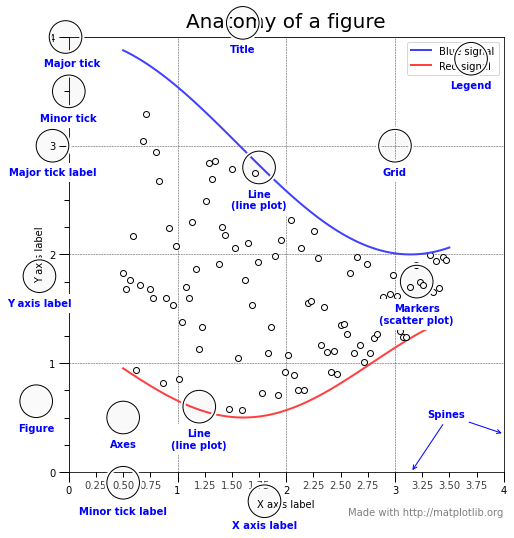

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

<br>

### 2.5.2 seaborn

- example : [http://seaborn.pydata.org/examples/index.html](http://seaborn.pydata.org/examples/index.html)
- user guide : [http://seaborn.pydata.org/tutorial.html](http://seaborn.pydata.org/tutorial.html)

<br>

### 2.5.3 한글 폰트 설정

- 리눅스 한글 폰트 설치 참고 : https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html

In [49]:
# 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

#font_family = get_font_family()

# 일반 폰트 설정
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

<AxesSubplot:title={'center':'한글폰트'}>

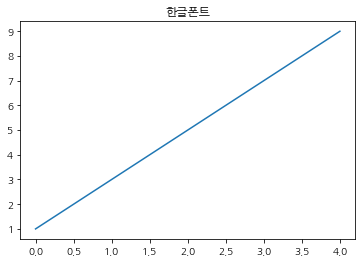

In [50]:
# 한글 폰트 확인
pd.Series([1, 3, 5, 7, 9]).plot(title='한글폰트')

<AxesSubplot:title={'center':'한글폰트'}>

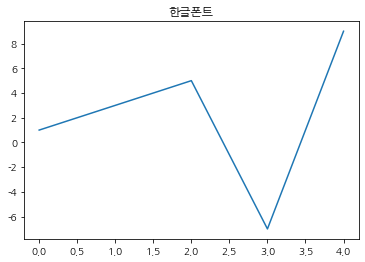

In [51]:
# 마이너스 폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

### 2.5.4 그래프 스타일 설정

In [52]:
# ggplot
plt.style.use('ggplot')

<AxesSubplot:title={'center':'한글폰트'}>

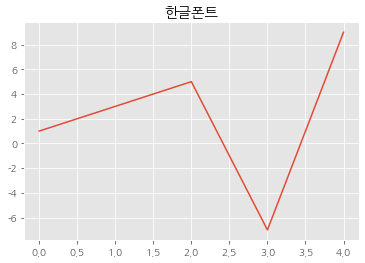

In [53]:
pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

In [54]:
# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<AxesSubplot:title={'center':'한글폰트'}>

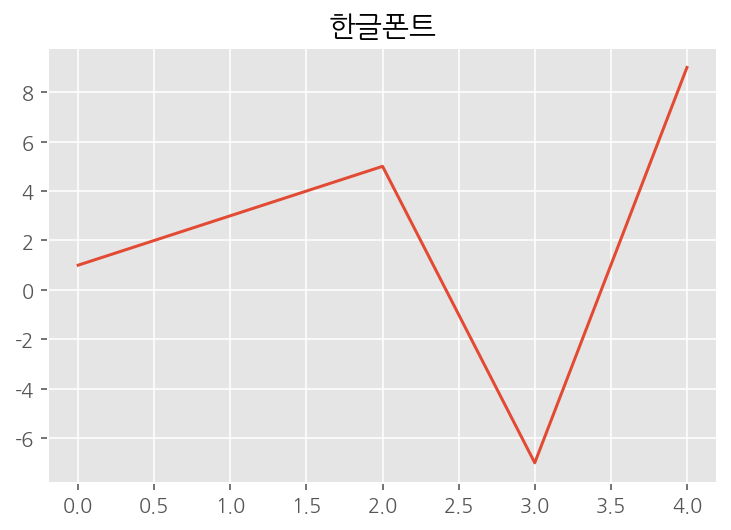

In [55]:
pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')